In [17]:
!pip install keras-tuner

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1/255)



val_datagen = ImageDataGenerator(rescale = 1/255)

In [20]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN /CNN Dataset/training_set',
                                                 target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN /CNN Dataset/test_set',
                                                           batch_size=32,
                                                           target_size=(64,64),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)


val_data =  val_datagen.flow_from_directory('/content/drive/MyDrive/CNN /CNN Dataset/validation_set',
                                            batch_size=32,
                                            target_size=(64,64),
                                            class_mode='sparse',
                                            shuffle=True,seed=1)
                                           

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [21]:
classes = {0:"hemmorhage_data",1:"non_hemmorhage_data"}
for i in classes.items():
    print(i)

(0, 'hemmorhage_data')
(1, 'non_hemmorhage_data')


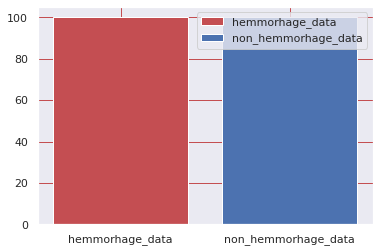

In [22]:
fig, ax = plt.subplots()
ax.bar("hemmorhage_data",100,label="hemmorhage_data",color="r")
ax.bar("non_hemmorhage_data",100,label="non_hemmorhage_data",color="b")
ax.grid('True',c='r')
ax.legend()

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,activation='softmax'))

In [24]:
#compile model
model.compile(optimizer="adadelta", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


#early stop 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [25]:
#fit the model
history=model.fit(train_data,
    validation_data = val_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
5/5 [==============================] - 3s 543ms/step - loss: 0.6989 - accuracy: 0.4172 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 2s 431ms/step - loss: 0.6986 - accuracy: 0.4227 - val_loss: 0.6926 - val_accuracy: 0.5250
Epoch 3/50
5/5 [==============================] - 2s 517ms/step - loss: 0.6950 - accuracy: 0.4580 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/50
5/5 [==============================] - 2s 423ms/step - loss: 0.6941 - accuracy: 0.5046 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 2s 426ms/step - loss: 0.6981 - accuracy: 0.4532 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 6/50
5/5 [==============================] - 2s 435ms/step - loss: 0.7005 - accuracy: 0.3813 - val_loss: 0.6921 - val_accuracy: 0.4750
Epoch 7/50
5/5 [==============================] - 2s 435ms/step - loss: 0.6958 - accuracy: 0.4597 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 8/50
5/5 [====

In [26]:
model.evaluate(test_data)

1/1 [==============================] - 0s 278ms/step - loss: 0.6852 - accuracy: 0.6500


[0.6851946115493774, 0.6499999761581421]

In [27]:
ypred = model.predict(test_data)
ypred = np.argmax(ypred,axis=1)

ypred 

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

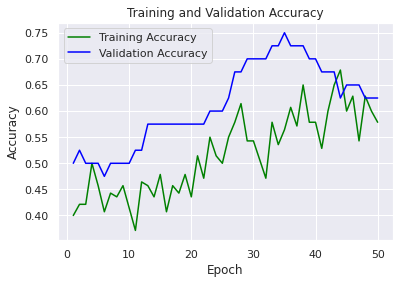

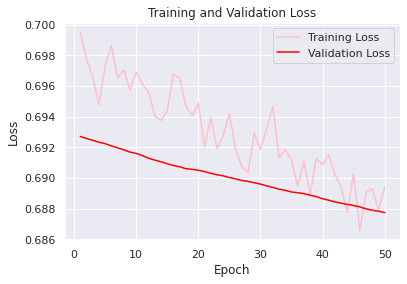

In [28]:
sn.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


[[9.9991655e-01 8.3388462e-05]]
[0]
hemmorhage_data


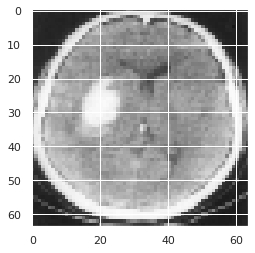

In [29]:
from keras.preprocessing import image
import numpy as np
image_path = '/content/drive/MyDrive/CNN /CNN Dataset/training_set/hemmorhage_data/034.png'
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[0.02237841 0.97762156]]
[1]
non_hemmorhage_data


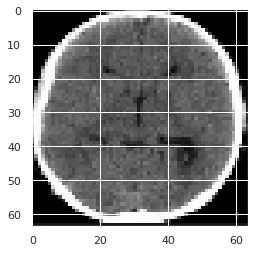

In [30]:
from keras.preprocessing import image
import numpy as np
image_path = '/content/drive/MyDrive/CNN /CNN Dataset/test_set/non_hemmorhage_data/104.png'
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[0]
hemmorhage_data


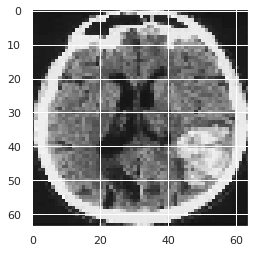

In [31]:
from keras.preprocessing import image
import numpy as np
image_path = '/content/drive/MyDrive/CNN /CNN Dataset/validation_set/hemmorhage_data/008.png'
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)